In [10]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
def DrawMetrics(base_dir, experiments_list=[], metrics=[], metric_names=None, max_step=None, step_size=None):
    fig, axes  = plt.subplots(len(metrics),1)
    name_mapper = {}
    for root, dirs, files in os.walk(base_dir):
        if "progress.csv" not in files:
            continue
        expName = root.split("/")[-2]
        if expName in experiments_list:
            try:
                df = pd.read_csv(root+"/progress.csv")
                if max_step is not None:
                    if step_size is not None:
                        df = df.loc[list(range(0,max_step,step_size))]
                    else:
                        df = df.loc[:max_step]
                for m_i, metric in enumerate(metrics):
                    if m_i==0:
                        axes[m_i].plot(df.index, df[metric], label=expName)
                    else:
                        axes[m_i].plot(df.index, df[metric])
            except pd.errors.EmptyDataError as ede:
                print(root)
                print("Empty data. " + str(ede))
                print()
            except KeyError as ke:
                print(root)
                print("no key " + str(ke))
                print()
    for m_i, metric in enumerate(metrics):
        if metric_names is None:
            axes[m_i].set_title(metric)
        else:
            axes[m_i].set_title(metric_names[m_i])
    fig.set_size_inches(15,15)
    fig.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


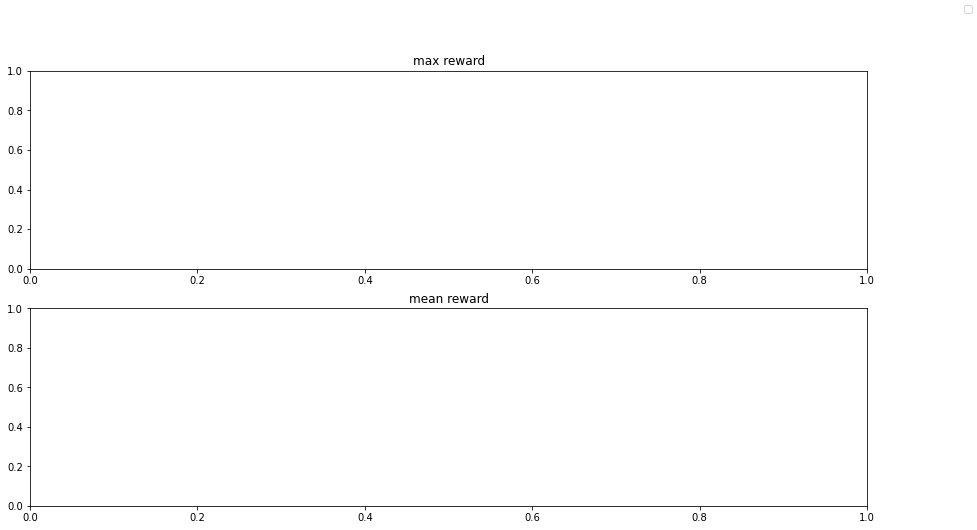

In [3]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS/allDefault/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    algoName = root.split("/")[-2]
    if algoName in ["appo_v2", "bc_v2", "a2c_v2", "marwil_v2", "impala_v2", "sac_v2", "es_v2"]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        if len(df) ==1:
            print(algoName, "1 iteration only")
        if "episode_reward_max" in df.columns:
            axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=algoName)
        else:
            print("No max column for {}, using cummax".format(algoName))
            axes[0].plot(df["timesteps_total"], df["episode_reward_mean"].cummax(), label=algoName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
axes[0].set_title("max reward")
axes[1].set_title("mean reward")
fig.set_size_inches(15,8)
fig.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


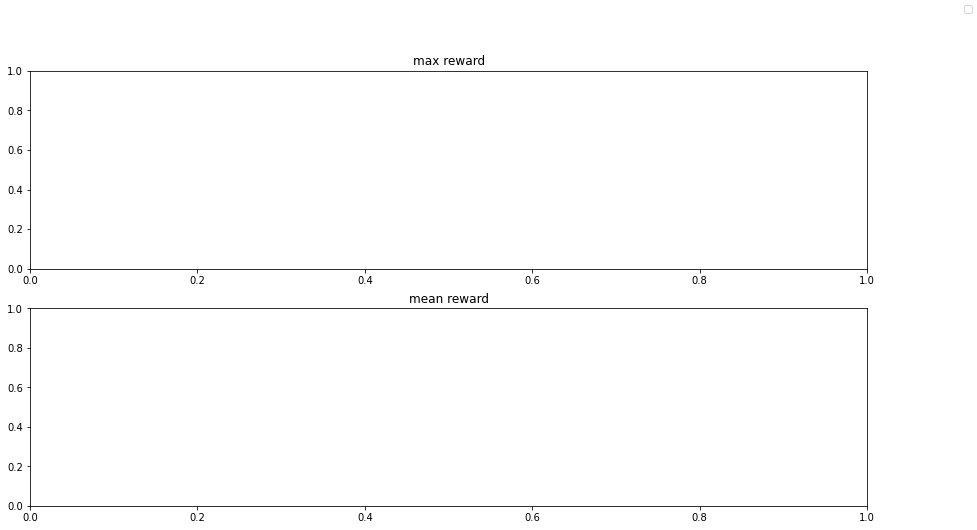

In [3]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    algoName = root.split("/")[-2]
    if algoName in ["appo", "bc", "a2c", "marwil", "impala", "sac", "a3c", "ars", "es"]:
    #if algoName in ["appo", "bc", "a2c", "marwil", "impala", "sac", "ddpg", "a3c"]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        if len(df) ==1:
            print(algoName, "1 iteration only")
        if "episode_reward_max" in df.columns:
            axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=algoName)
        else:
            print("No max column for {}, using cummax".format(algoName))
            axes[0].plot(df["timesteps_total"], df["episode_reward_mean"].cummax(), label=algoName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
axes[0].set_title("max reward")
axes[1].set_title("mean reward")
fig.set_size_inches(15,8)
fig.legend()
plt.show()

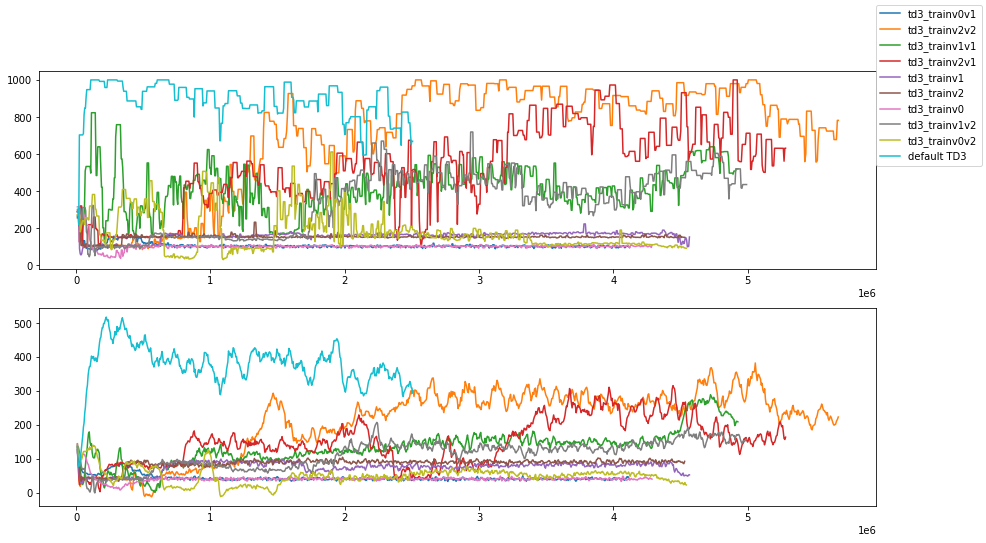

In [5]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/train/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in [#"td3_trainv0", "td3_trainv0v1", "td3_trainv0v2",
                    #"td3_trainv1", "td3_trainv1v1", "td3_trainv1v2",
                    #"td3_trainv2", "td3_trainv2v1", "td3_trainv2v2",
                    "td3_trainv0v3", "td3_trainv1v3", "td3_trainv2v3",
                    "td3_trainv4v0v0", "td3_trainv4v1v0","td3_trainv4v2v0", "td3_trainv4v3v0",
                    "td3_trainv4v0v1", "td3_trainv4v0v2", "td3_trainv4v0v3"
                    ]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()

df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

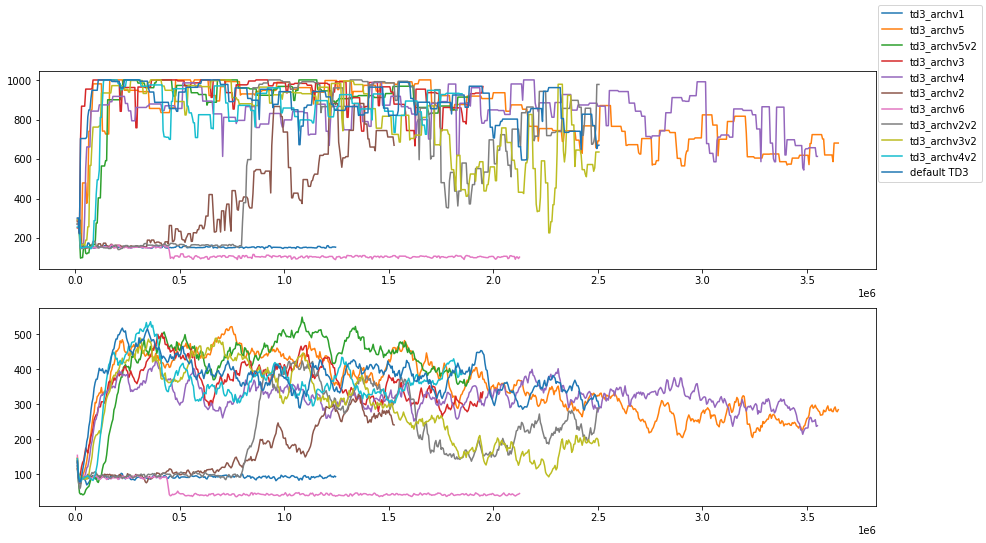

In [6]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/arch/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    #if expName in ["td3_archv6", "td3_archv1", "td3_archv2", "td3_archv2v2"]:
    #    continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

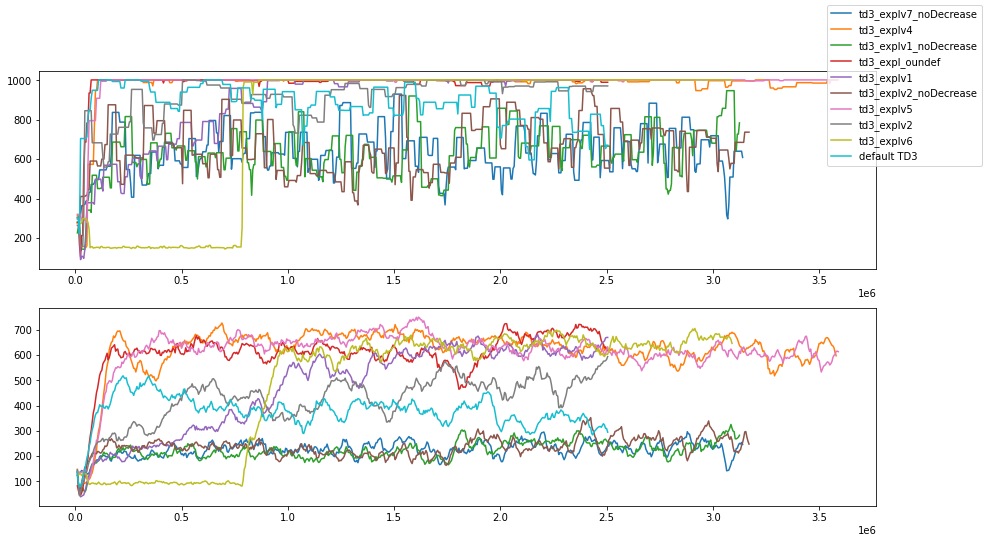

In [7]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/explore/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in []:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

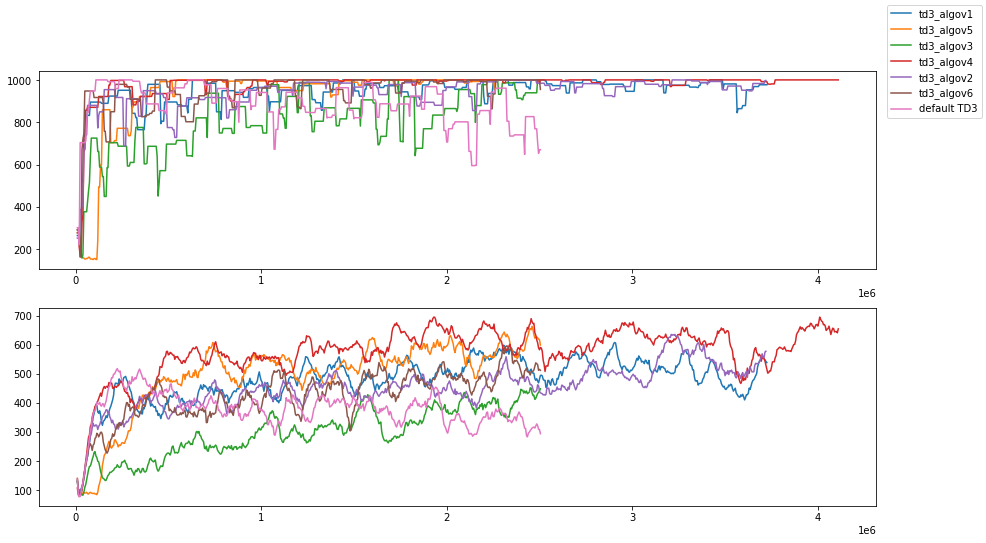

In [8]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/algorythm/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in []:
        continuea
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

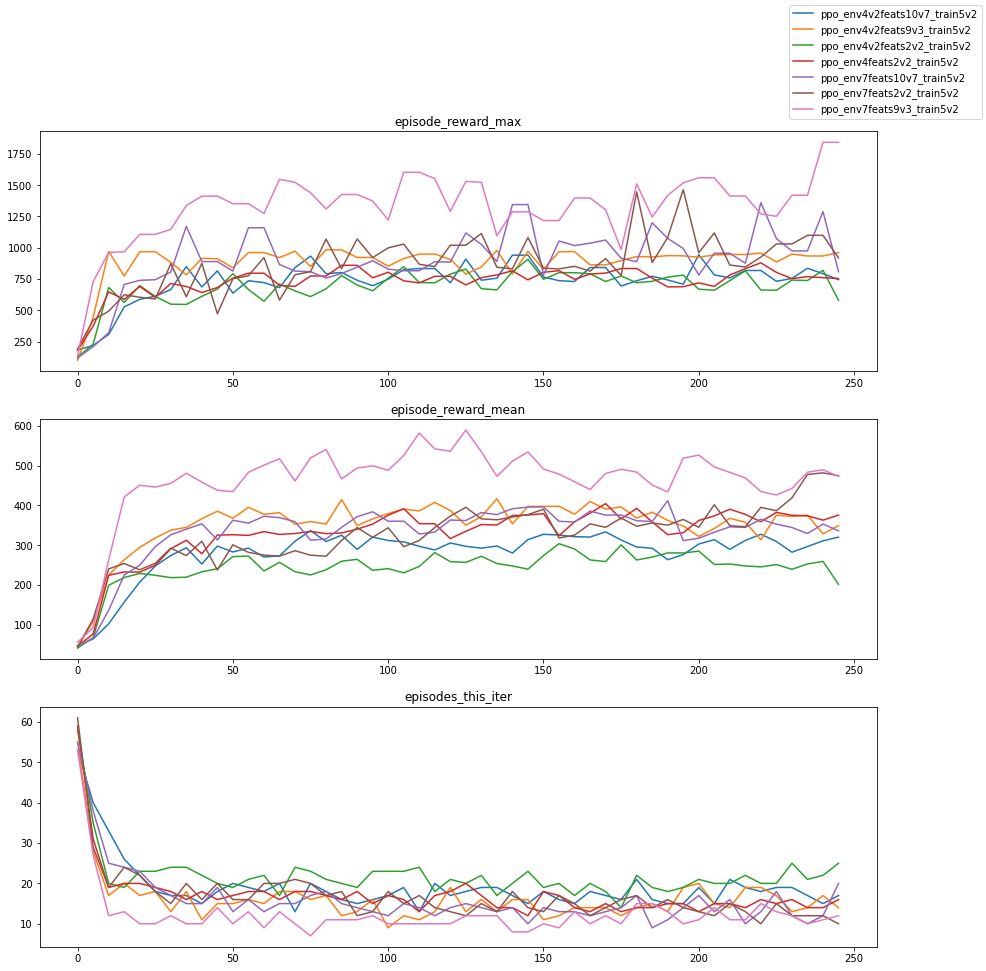

In [84]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/"
experiments_list = ["ppo_env4v2feats10v7_train5v2", "ppo_env4v2feats9v3_train5v2", "ppo_env4v2feats2v2_train5v2",
                   "ppo_env4feats2v2_train5v2", 
                   "ppo_env7feats2v2_train5v2", "ppo_env7feats10v7_train5v2", "ppo_env7feats9v3_train5v2"]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episodes_this_iter'], max_step=250, step_size=5)

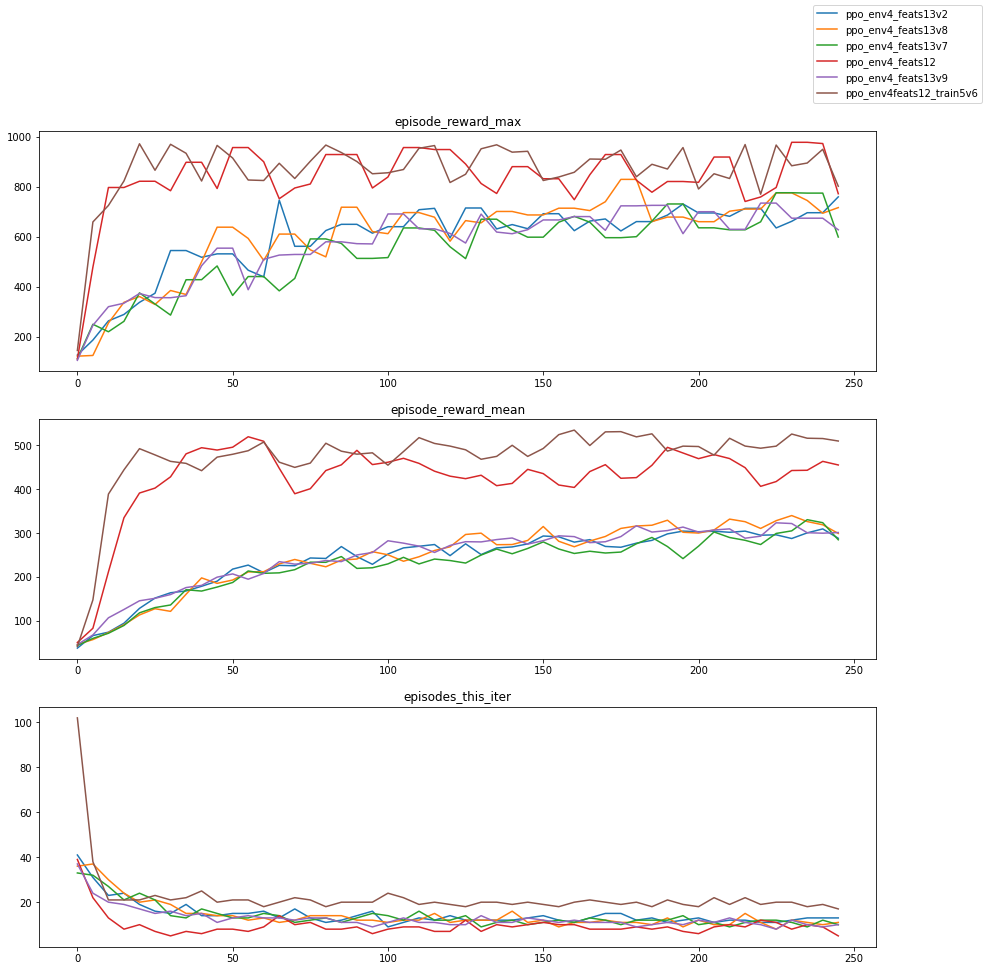

In [82]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/"
experiments_list = ["ppo_env4feats12_train5v6", "ppo_env4_feats12", 
                      # "ppo_env4_feats13",  # без сейф зоны - не очень
                       "ppo_env4_feats13v2", #"ppo_env4feats13v2_train5v6", 
                     # "ppo_env4_feats13v3",  "ppo_env4_feats13v5",  # коэффициент забывания 0.01 - плохо
                       #"ppo_env4_feats13v4",  # - незакрышиваем зону (криво реализован)
                     # "ppo_env4_feats13v6",  # как 13v2, но более точно отрисована зона - вроде немного хуже, что странно
                       "ppo_env4_feats13v7", "ppo_env4_feats13v8", "ppo_env4_feats13v9",  # коэффициенты забывания 0.1 0.2 0.5 - без разницы
                       #"ppo_env4_feats13v10", "ppo_env4_feats13v11" # коэффициент забывания = 1 - очень плохо
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episodes_this_iter'], max_step=250, step_size=5)

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/default_model/feats_v14v2/ppo_e28_b1_f14v2_prev5_m_trans_v4v2_backup/PPO_continuous-grid_5f031_00000_0_2023-06-14_18-08-51
no key '[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245] not in index'

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/default_model/feats_v14v2/ppo_e28_b1_f14v2_prev5_m_trans_v4v2_backup/PPO_continuous-grid_83085_00000_0_2023-06-14_18-02-42
no key '[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245] not in index'

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/d

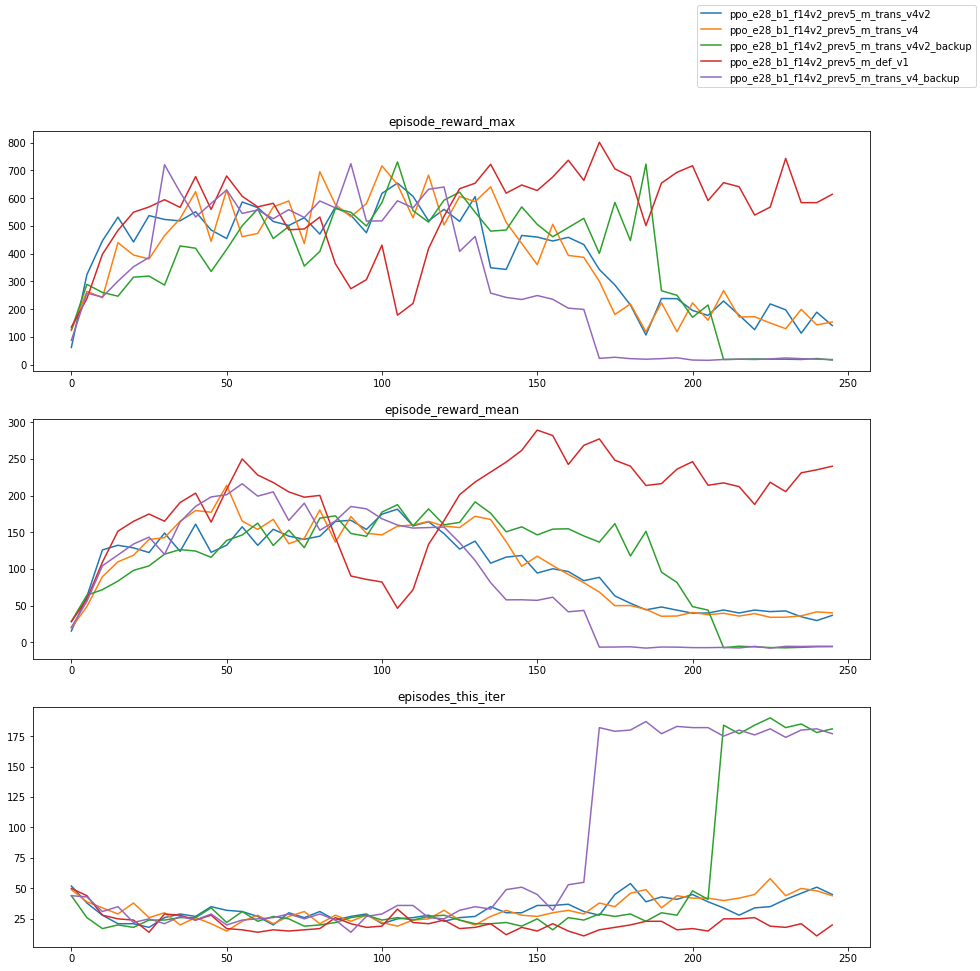

In [3]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/default_model/feats_v14v2/"
experiments_list = ["ppo_e28_b1_f14v2_prev5_m_def_v1", 
               #"ppo_e28_b1_f14v2_prev5_m_trans_v1",  # GlobalAveragePooling - плохо
               "ppo_e28_b1_f14v2_prev5_m_trans_v4_backup", "ppo_e28_b1_f14v2_prev5_m_trans_v4v2_backup",  # kl уходит в nan, возможно из-за слишком больших предсказываемых log_std для поворота
               "ppo_e28_b1_f14v2_prev5_m_trans_v4", 
               #"ppo_e28_b1_f14v2_prev5_m_trans_v5",  # без нормализации и дропаутов - плохо
               "ppo_e28_b1_f14v2_prev5_m_trans_v4v2",
               #"ppo_e28_b1_f14v2_prev5_m_trans_v4v3"  # GlobalAveragePooling - плохо
              ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episodes_this_iter'], max_step=250, step_size=5)


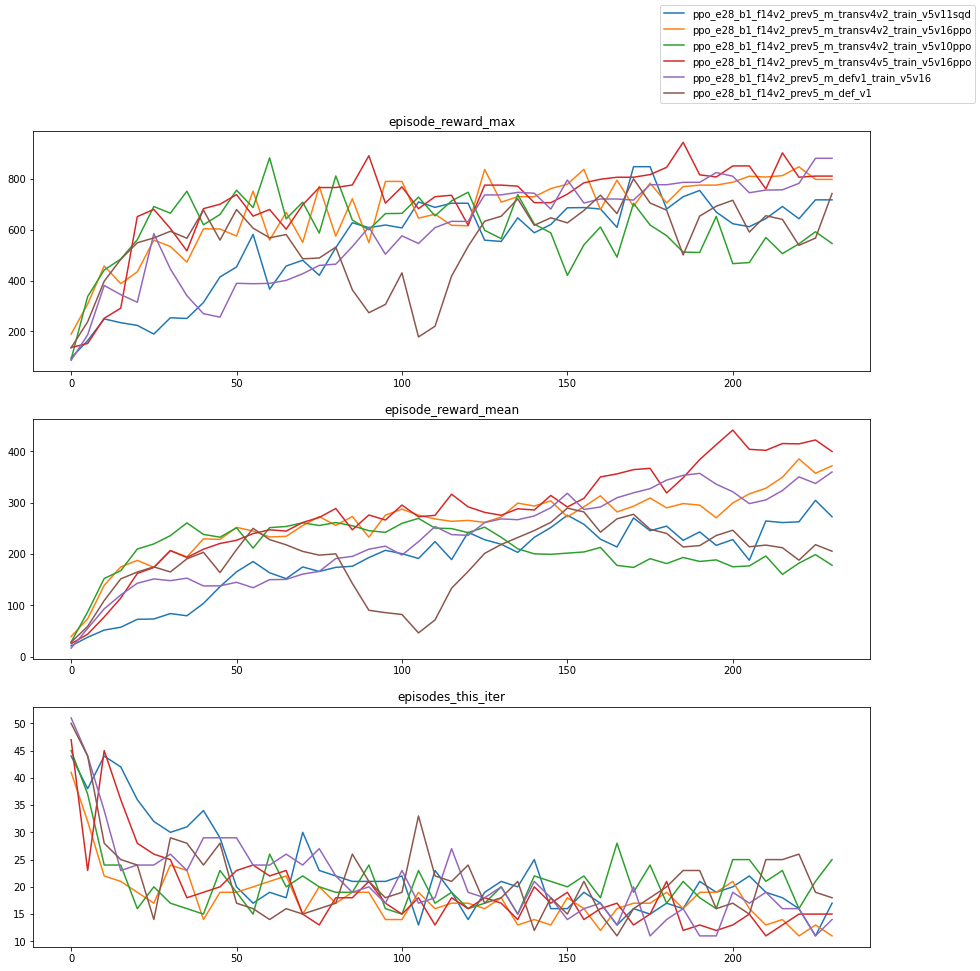

In [12]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/"
experiments_list = ["ppo_e28_b1_f14v2_prev5_m_def_v1",  # FCN со старыми параметрами
                       #"ppo_e28_b1_f14v2_prev5_m_trans_v4v2", # train_batch_size = 6000 sgd_minibatch_size = 256 - трансформер с теми же параметрами хреново обучился
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v6sqd", # train_batch_size = 10000 sgd_minibatch_size = 512  # - больший батч не помог
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v10ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.001
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v11sqd", # train_batch_size = 6000 sgd_minibatch_size = 256 lr = .00001
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v12ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.01 lambda = 0.5  # lambda 0.5 - не очень, велью лосс должен быть больше или соизмерим с полиси лосом
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v13ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.01 lambda = 0.1  # lambda 0.1 - плохо
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v14ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.1 lambda = 0.5  # lambda 0.5 - не очень
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v15ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.1 lambda = 0.1  # lambda 0.1 - плохо
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v16ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 lr = .00001 vf_loss_coeff = 0.001  # внезапно хуже чем только низкий ЛР или только низкие коэф
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v17ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.0001  # - хуже чем 0.001
                       "ppo_e28_b1_f14v2_prev5_m_transv4v5_train_v5v16ppo",
                       "ppo_e28_b1_f14v2_prev5_m_defv1_train_v5v16",
                       #"ppo_e28_b1_f14v2_prev5_m_raytrans_train_v5v16ppo"  # - реевский трансформер - херня, и в нан свалился. надо параметры доподбирать.
                    # можно ещё попробовать совместить лямбду 0.5 ЛР и коэф.
                      ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episodes_this_iter'], max_step=235, step_size=5)


In [3]:
import tensorflow as tf
tf.__version__

'2.6.0'

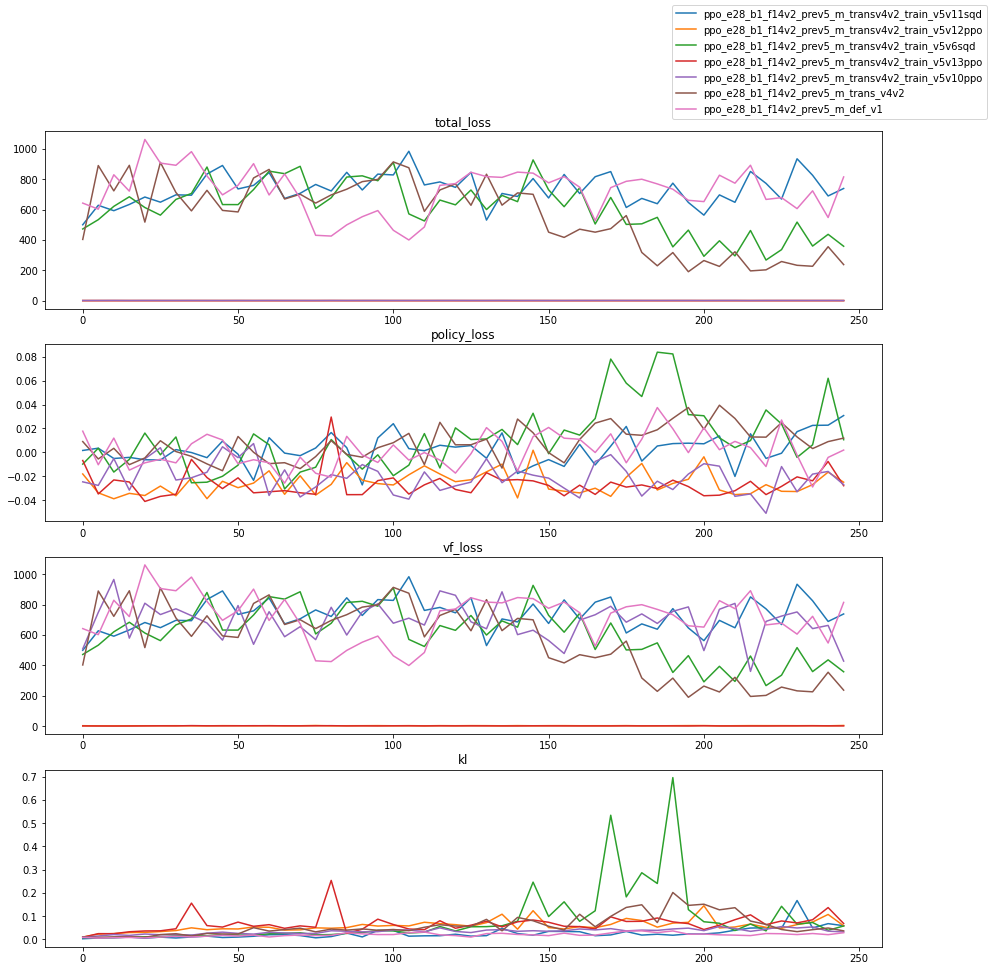

In [50]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/"
experiments_list = ["ppo_e28_b1_f14v2_prev5_m_def_v1",
                       "ppo_e28_b1_f14v2_prev5_m_trans_v4v2",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v6sqd",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v10ppo",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v11sqd",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v12ppo",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v13ppo"
                      ]
metrics = ["info/learner/default_policy/learner_stats/total_loss",
           "info/learner/default_policy/learner_stats/policy_loss",
           "info/learner/default_policy/learner_stats/vf_loss",
           #"info/learner/default_policy/learner_stats/vf_explained_var",
           "info/learner/default_policy/learner_stats/kl",
           #"info/learner/default_policy/learner_stats/entropy"
          ]
metric_names = [
    "total_loss",
    "policy_loss",
    "vf_loss",
    #"vf_explained_var",
    "kl",
    #"entropy"
]
DrawMetrics(base_dir, experiments_list, metrics=metrics, metric_names=metric_names, max_step=250, step_size=5)


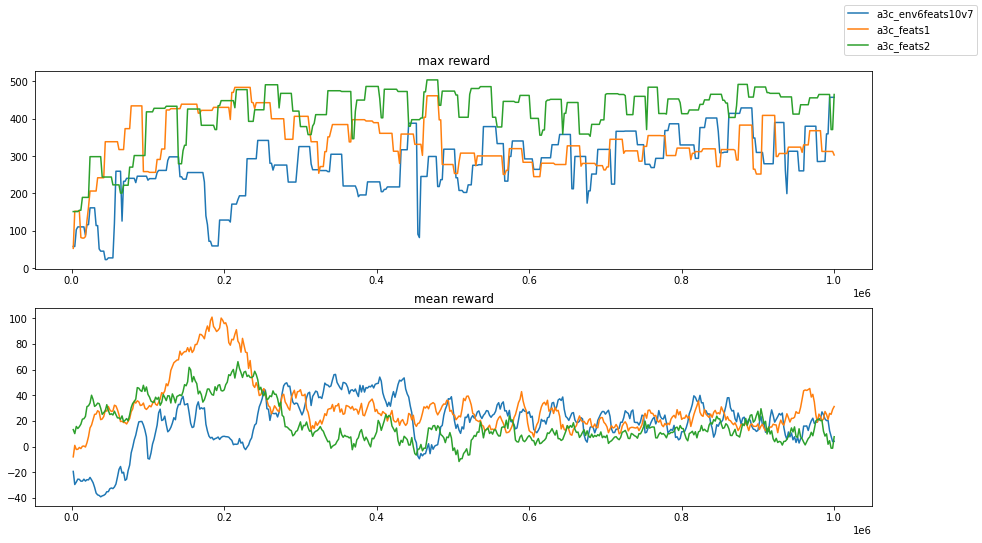

In [8]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS_disc/A3C/feats/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in ["a3c_arch3", "a3c_arch4"]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
#df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS_disc/A3C/)
#axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default a3c")
#axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
axes[0].set_title("max reward")
axes[1].set_title("mean reward")
fig.set_size_inches(15,8)
fig.legend()
plt.show()

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_tv5v20/PPO_continuous-grid_6ba8b_00000_0_2023-07-26_16-57-55
no key '[295] not in index'



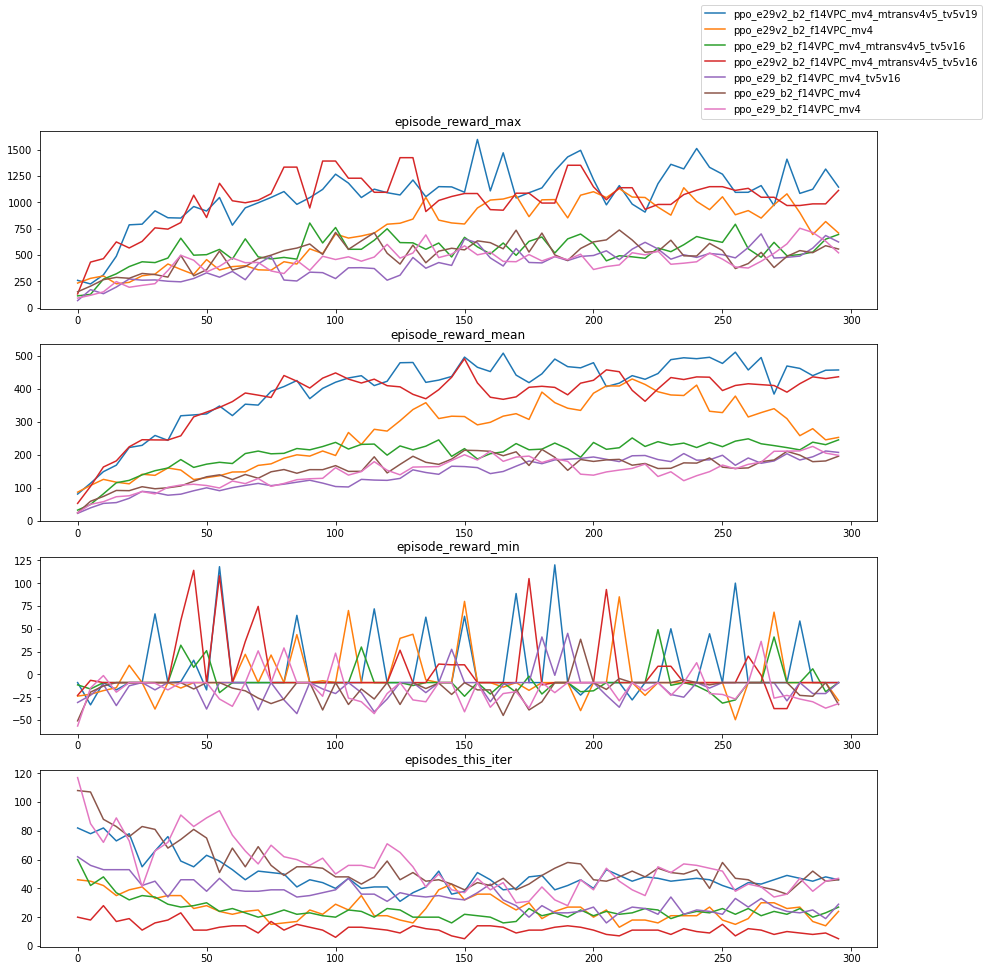

In [20]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/"
experiments_list = [#"ppo_e29_b1_f14VPC_ar","ppo_e29_b1_f14VPC_mv4",
                    #"ppo_e29_b2_f14VPC_ar",
                    "ppo_e29_b2_f14VPC_mv4",
                    "ppo_e29_b2_f14VPC_mv4_tv5v16",
                    "ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16",
                    "ppo_e29v2_b2_f14VPC_mv4",
                    "ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v16"
                    "ppo_e29v2_b2_f14VPC_mv4",
                    "ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v16",
                    "ppo_e29v2_b2_f14VPC_mv4_tv5v20",
                    "ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19"
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episode_reward_min', 'episodes_this_iter'], max_step=300, step_size=5)


In [8]:
import pandas as pd
run_1 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4/PPO_continuous-grid_399ae_00000_0_2023-07-21_14-24-58/checkpoint-250_test.csv"
run_2 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_tv5v16/PPO_continuous-grid_e56c7_00000_0_2023-07-20_18-05-42/checkpoint-250_test.csv"
run_3 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4/PPO_continuous-grid_e1e7b_00000_0_2023-07-25_16-40-57/checkpoint-250_test.csv"
run_4 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v16/PPO_continuous-grid_e1e7b_00001_1_2023-07-25_16-41-33/checkpoint-250_test.csv"
run_1_df = pd.read_csv(run_1, sep=";")
run_2_df = pd.read_csv(run_2, sep=";")
run_3_df = pd.read_csv(run_3, sep=";")
run_4_df = pd.read_csv(run_4, sep=";")
run_1_df["mission_status"].value_counts(), run_2_df["mission_status"].value_counts(),run_3_df["mission_status"].value_counts() ,run_4_df["mission_status"].value_counts()

(fail                51
 success             26
 in_progress         16
 finished_by_time     7
 Name: mission_status, dtype: int64,
 fail                80
 in_progress          9
 success              9
 finished_by_time     2
 Name: mission_status, dtype: int64,
 fail                79
 in_progress          9
 finished_by_time     7
 success              5
 Name: mission_status, dtype: int64,
 fail                76
 success             11
 in_progress         11
 finished_by_time     2
 Name: mission_status, dtype: int64)

In [9]:
run_1_df

,seed,reward,done,time,steps_count,mission_status,agent_status,leader_status
0,4,185.7,True,00:00:37,457,success,finished,finished
1,5,330.0,True,00:00:25,340,in_progress,moving,moving
2,7,312.3,True,00:01:28,926,success,finished,finished
3,9,391.7,True,00:02:00,942,finished_by_time,moving,moving
4,10,-9.0,True,00:00:00,1,in_progress,moving,moving
...,...,...,...,...,...,...,...,...
95,195,66.5,True,00:00:04,77,in_progress,moving,moving
96,196,85.0,True,00:00:06,95,in_progress,moving,moving
97,197,302.7,True,00:00:23,352,fail,crash,moving
98,198,214.4,True,00:00:40,499,fail,crash,moving


In [80]:
import pandas as pd
run_1 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4/PPO_continuous-grid_399ae_00000_0_2023-07-21_14-24-58/checkpoint-275_test.csv"
run_2 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_tv5v16/PPO_continuous-grid_e56c7_00000_0_2023-07-20_18-05-42/checkpoint-275_test.csv"
run_3 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4/PPO_continuous-grid_e1e7b_00000_0_2023-07-25_16-40-57/checkpoint-275_test.csv"
run_4 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v16/PPO_continuous-grid_e1e7b_00001_1_2023-07-25_16-41-33/checkpoint-275_test.csv"
run_1_df = pd.read_csv(run_1, sep=";")
run_2_df = pd.read_csv(run_2, sep=";")
run_3_df = pd.read_csv(run_3, sep=";")
run_4_df = pd.read_csv(run_4, sep=";")
run_1_df["mission_status"].value_counts(), run_2_df["mission_status"].value_counts(),run_3_df["mission_status"].value_counts() ,run_4_df["mission_status"].value_counts()

(fail                67
 success             22
 in_progress          8
 finished_by_time     3
 Name: mission_status, dtype: int64,
 fail                71
 in_progress         13
 success             11
 finished_by_time     5
 Name: mission_status, dtype: int64,
 fail                66
 in_progress         14
 finished_by_time    10
 success             10
 Name: mission_status, dtype: int64,
 fail                74
 success             14
 in_progress          7
 finished_by_time     5
 Name: mission_status, dtype: int64)

In [15]:
import pandas as pd
run_1 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4/PPO_continuous-grid_399ae_00000_0_2023-07-21_14-24-58/checkpoint-300_test.csv"
run_2 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_tv5v16/PPO_continuous-grid_e56c7_00000_0_2023-07-20_18-05-42/checkpoint-300_test.csv"
run_3 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4/PPO_continuous-grid_e1e7b_00000_0_2023-07-25_16-40-57/checkpoint-300_test.csv"
run_4 = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v16/PPO_continuous-grid_e1e7b_00001_1_2023-07-25_16-41-33/checkpoint-300_test.csv"
run_1_df = pd.read_csv(run_1, sep=";")
run_2_df = pd.read_csv(run_2, sep=";")
run_3_df = pd.read_csv(run_3, sep=";")
run_4_df = pd.read_csv(run_4, sep=";")
run_1_df["mission_status"].value_counts(), run_2_df["mission_status"].value_counts(),run_3_df["mission_status"].value_counts() ,run_4_df["mission_status"].value_counts()

(fail                69
 success             24
 in_progress          4
 finished_by_time     3
 Name: mission_status, dtype: int64,
 fail                12
 finished_by_time     3
 in_progress          1
 success              1
 Name: mission_status, dtype: int64,
 fail                67
 finished_by_time    20
 in_progress          8
 success              5
 Name: mission_status, dtype: int64,
 fail                67
 success             15
 finished_by_time    14
 in_progress          4
 Name: mission_status, dtype: int64)